In [1]:
import os
import pickle
import numpy as np
import matplotlib as mpl
from matplotlib import colors
from matplotlib import pyplot as plt

In [2]:
def visualize(cname, filename, data_dir):
    with open(os.path.join(data_dir, filename), 'rb') as f:
        learner = pickle.load(f)
    # print("Num ProMPs:", learner.promp_library.get_num_promps())
    
    color = colors.cnames[cname]

    fig, ax = plt.subplots()
    ax.set_ylim(-0.275, 0.275)
    ax.set_xlim(-0.9, -0.55)
    fig.set_size_inches(3.5, 5.5)

    for promp_key in learner.promp_library.promps.keys():
        promp = learner.promp_library.get_promp(promp_key)
        mean, cov = promp.get_traj_params(1.0, promp.w_keys)
        if not np.any(mean) or not np.any(cov):
            continue
        mean = mean[:2]
        plt.scatter(mean[0], mean[1])
        cov = cov[:2,:2]
        v, w = np.linalg.eigh(cov)
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        u = w[0] / np.linalg.norm(w[0])
        angle = np.arctan(u[1] / u[0])
        angle = 180. * angle / np.pi
        ell = mpl.patches.Ellipse(mean, v[0], v[1], 180. + angle, color=color)
        ell.set_clip_box(ax.bbox)
        ell.set_alpha(0.5)
        ax.add_artist(ell)

    plt.show()

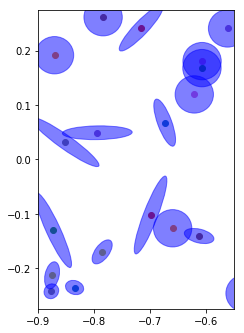

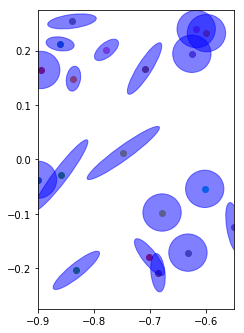

In [18]:
# TODO plot mahal and rand side by side

cname="blue"
index = 30
trial = 6
filename = "active_learner_{:03d}.pkl".format(index)
rand_dir = "/media/adam/data_haro/promp_active_learning_data/experiment_1/random/trial_{}/learners".format(trial)
mahal_dir = "/media/adam/data_haro/promp_active_learning_data/experiment_1/least_confident/trial_{}/learners".format(trial)


visualize(cname, filename, rand_dir)
visualize(cname, filename, mahal_dir)